<a href="https://colab.research.google.com/github/SeongYunHong/Mirae-Python_Machine_Learning/blob/main/14_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

XGBoost
* 대량의 데이터처리, 고속
* 결측치에서 특성 패턴을 찾아서 자동으로 결측치 처리
* 분산처리 및 병렬처리
  - hadoop
  - spark
  - kubernetis
* 언어적 호환성
  - R, Python, Java 등과 협업
* 모델 저장과 로딩 가능
* boost의 종류 : gblinear, gbtree, dart(gbtree를 상속받고 : 정규화, dropout 지원)
  - dropout : 행렬연산에서 모든 연산을 다하면 과적합됨 -> 일부회로는 계산하지 않는 것(보통 80%만 계산)
* 알고리즘의 변화 최소제곱법(선형회귀) -> 경사하강법(학습률)
* 오차학습법( 오차 = (예측값 - 실제값)**2 -> 포물선 => 오차로 뒤에 있는 가중치를 수정 : 신경망)
  - 데이터 * 가중치 = 예측치 (learning rate (eta))

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data=load_iris()
X_train,X_test,y_train,y_test=train_test_split(data['data'],data['target'],test_size=.2)
dtrain=xgb.DMatrix(data=X_train, label=y_train) #xgb의 전용행렬 #dtrain으로 둘을 하나로 묶음
dtest=xgb.DMatrix(data=X_test, label=y_test)
#regularization
param={'max_depth':2,'eta':1,'objective':'multi:softmax','num_class':3} #eta : learning rate : 학습률 #objective(회귀(reg : squared error), 분류(binary:logistic(이진분류), multi:softmax(다중분류)))
#softmax : 클래스별로(범주별) 확률을 계산(구성비를 이용해서)
num_round=2

bst=xgb.train(param,dtrain,num_round)

preds=bst.predict(dtest)
print(preds[:5])

[2. 0. 2. 0. 1.]


In [ ]:
#dart를 활용해서
param={'booster':'dart',
       'max_depth':5,
       'learning_rate':0.1, #학습률
       'objective':'multi:softmax',
       #dart의 전용 파라미터(4개)
       #-------------------
       'sample_type':'uniform',
       'normalize_type':'tree', #tree, forest(평균을 낼 때 사용)
       'rate_drop':0.1, #dropout 비율
       'skip_drop':0.5,
       #-------------------
       'num_class':3}
num_round=50
bst=xgb.train(param,dtrain,num_round)
preds=bst.predict(dtest)
preds

array([0., 0., 1., 0., 2., 1., 2., 0., 0., 2., 1., 0., 2., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 2., 0., 2., 1., 0., 0., 1., 2.], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score #일반함수
accuracy_score(preds,y_test) #accuracy_score(예측값, 실제값)

0.9333333333333333

In [ ]:
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data=load_iris()
X_train,X_test,y_train,y_test=train_test_split(data['data'],data['target'],test_size=.2)
#booster를 wrapper(감싼) -> scikits와 연동된 모델
#scikits 모델로 인식됨
#scikits 측에서 사용자 지정 모델을 작성할 수 있도록 open 시켜
bst=XGBClassifier(n_estimator=2,max_depth=2,learning_rate=1,num_class=3,objective='binary:logistic')
bst.fit(X_train,y_train)
preds=bst.predict(X_test)
bst.score(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:13:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


0.9666666666666667

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
title =  ['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE','RAD', 'TAX','PTRATIO',
          'B', 'LSTAT', 'medv'] #12 종속변수
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print(type(data))
boston_df = pd.DataFrame(data, columns = title )
boston_df.head()

<class 'numpy.ndarray'>


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
X=boston_df.iloc[:,:12]
print(X.shape)
y=boston_df.iloc[:,12]
print(y.shape)

(506, 12)
(506,)


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2, random_state=123)

In [ ]:
#회귀모델 -> 분류, 예측
#예측 용도
#gblinsar에서는 "colsample_bytree", "max_depth"불필요
#squarederror = (예측치- 실제값)**2 -> 비용함수로 사용
xg_reg=xgb.XGBRegressor(booster='gbtree',objective='reg:squarederror',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=10,n_estimator=20)
#colsample_bytree=0.3 : 속성, 변수의 30%만 고려(단순화 시켜라)
#learning_rate가 작으면 오래걸리고, 크면 최적화가 안될수도 있음(처음에는 크게 나중에 작게해줘야함)
#L1 강도 : alpha
xg_reg.fit(X_train,y_train)
preds=xg_reg.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,preds)) #RMSE = Root Mean Squared Error(제곱해준 값에 루트 씌워줌)
print("RMSE : %f"%(rmse))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:30:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE : 3.927077


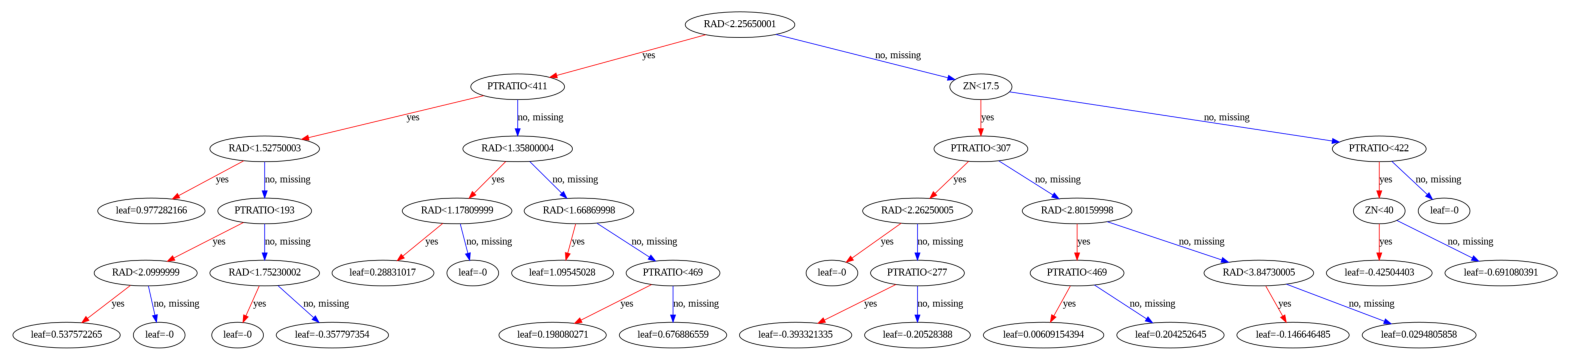

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_tree(xg_reg,num_trees=0) #구조값만 나옴
plt.rcParams['figure.figsize']=[200,100]
plt.show()

In [ ]:
data_dmatrix=xgb.DMatrix(data=X,label=y) #데이터를 나누지 않고 통째로 집어넣음
params={'objective':'reg:squarederror','colsample_bytree':0.3,'learning_rate':0.1,'max_depth':5,'alpha':10}
#booster
#XGBClassifier : scikits wrapper
#데이터를 한꺼번에 입력하더라도 내부에서 train/test 데이터를 나눠서 처리
#callbacks 함수 : 시스템에서 직접 호출하는 호출함수
cv_results=xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=500, early_stopping_rounds=10,metrics='rmse',as_pandas=True,seed=123, callbacks=[xgb.callback.EvaluationMonitor(show_stdv=True)])
#nfold=3 : 데이터를 3덩이로 나눠라 #num_boost_round=50 : 오차를 줄여나가는 횟수 50번 #early_stopping_rounds=10 : 10번 이상이면 종료 #metrics='rmse' : 평가 기준
print(cv_results.head())

[0]	train-rmse:6.75129+0.05441	test-rmse:6.82019+0.13762
[1]	train-rmse:6.40630+0.03029	test-rmse:6.53104+0.13838
[2]	train-rmse:6.09260+0.01323	test-rmse:6.29082+0.15014
[3]	train-rmse:5.86080+0.02939	test-rmse:6.12159+0.16615
[4]	train-rmse:5.62165+0.03553	test-rmse:5.93653+0.13593
[5]	train-rmse:5.38394+0.03948	test-rmse:5.75802+0.12321
[6]	train-rmse:5.25579+0.05007	test-rmse:5.65999+0.11301
[7]	train-rmse:5.06409+0.05239	test-rmse:5.52955+0.09936
[8]	train-rmse:4.88735+0.06385	test-rmse:5.40221+0.09753
[9]	train-rmse:4.63469+0.06177	test-rmse:5.21373+0.07699
[10]	train-rmse:4.54071+0.06969	test-rmse:5.13419+0.07287
[11]	train-rmse:4.42213+0.07748	test-rmse:5.05193+0.05810
[12]	train-rmse:4.29481+0.08628	test-rmse:4.97589+0.04683
[13]	train-rmse:4.24072+0.08316	test-rmse:4.93821+0.04273
[14]	train-rmse:4.18789+0.08693	test-rmse:4.89866+0.03851
[15]	train-rmse:4.09606+0.08285	test-rmse:4.84858+0.03358
[16]	train-rmse:3.93866+0.06845	test-rmse:4.73318+0.02802
[17]	train-rmse:3.86999+

In [ ]:
cv_results['test-rmse-mean'].tail(1)

206    3.806411
Name: test-rmse-mean, dtype: float64

In [ ]:
#hyper parameter tuning -> 어제는 GridSearchCV로 진행
#RandomizedSearchCV(연속적인 경우)와 GridSearchCV
import scipy.stats as st
xgbreg=xgb.XGBRegressor(objective='reg:squarederror',n_jobs=-1) #n_jobs=-1 : 사용할 코어의 개수(-1이면 전부 다 사용)
params={'n_estimators':st.randint(3,40),        #24
        'max_depth':st.randint(3,40),           #5
        'learning_rate':st.uniform(0.05,0.4),   #0.12
        'gamma':st.uniform(0,10)}               #1.36

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
gs=RandomizedSearchCV(xgbreg,params,n_jobs=1)
gs.fit(X_train,y_train)
gs.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1.551271477456131, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.4498685675701387,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=27, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=8, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
gs.best_params_

{'gamma': 1.551271477456131,
 'learning_rate': 0.4498685675701387,
 'max_depth': 27,
 'n_estimators': 8}

In [ ]:
#문제
#다음을 XGBClassifier로 구현해보시오
#훈련정확도와 테스트 정확도를 출력하시오
#params={'n_estimators':st.randint(3,40),
#        'max_depth':st.randint(3,40),
#        'learning_rate':st.uniform(0.05,0.4),
#        'gamma':st.uniform(0,10)}
#parameter tuning 후 테스트 정확도 다시 출력하시오
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/mirae/csv/pima.csv')
df=df.iloc[:,1:]
X=df.iloc[:,:7]
y=pd.get_dummies(df.iloc[:,7])

In [ ]:
#다음을 XGBClassifier로 구현해보시오
#훈련정확도와 테스트 정확도를 출력하시오
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3, random_state=12)

bst=XGBClassifier(n_estimators=2,max_depth=2,learning_rate=0.01,objective='binary:logistic')
bst.fit(X_train,y_train)
pred=bst.predict(X_test)
print("튜닝 전 트레인 : ",bst.score(X_train,y_train)) #0.8189655172413793
print("튜닝 전 테스트 : ",bst.score(X_test,y_test))   #0.72

print("튜닝 전 트레인 : ",accuracy_score(bst.predict(X_train),y_train)) #0.8189655172413793
print("튜닝 전 테스트 : ",accuracy_score(bst.predict(X_test),y_test))   #0.72

튜닝 후 트레인 :  0.8189655172413793
튜닝 후 테스트 :  0.72
튜닝 후 트레인 :  0.8189655172413793
튜닝 후 테스트 :  0.72


In [ ]:
#parameter tuning 후 테스트 정확도 다시 출력하시오
import scipy.stats as st
from sklearn.model_selection import RandomizedSearchCV
params={'n_estimators':st.randint(3,40),        #31
        'max_depth':st.randint(3,40),           #26
        'learning_rate':st.uniform(0.05,0.4),   #0.28
        'gamma':st.uniform(0,10)}               #1.02

gs=RandomizedSearchCV(bst,params,n_jobs=1)
gs.fit(X_train,y_train)
gs.best_estimator_
gs.best_params_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5.025403949520087, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.141315617269392,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=24, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=35, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
print("튜닝 후 트레인 : ",gs.score(X_train,y_train)) #0.69
print("튜닝 후 테스트 : ",gs.score(X_test,y_test))   #0.62

print("튜닝 후 트레인 : ",accuracy_score(gs.best_estimator_.predict(X_train),y_train)) #0.85
print("튜닝 후 테스트 : ",accuracy_score(gs.best_estimator_.predict(X_test),y_test))   #0.74

튜닝 후 트레인 :  0.8577586206896551
튜닝 후 테스트 :  0.74
튜닝 후 트레인 :  0.8577586206896551
튜닝 후 테스트 :  0.74
